<a href="https://colab.research.google.com/github/unnimaya-vu/unnimaya-vu/blob/main/movierating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

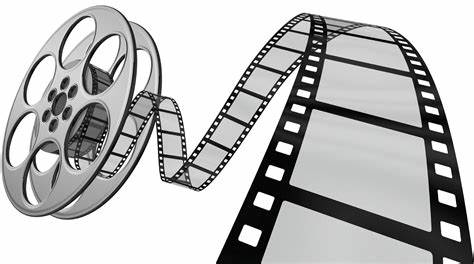

# **Movie Rating system**

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

Read the data

In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Explore through data

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')
#converts each element of the specified columns into a row
df = df.explode('Genre')
df['Genre'].unique()


array(['Drama', 'Musical', 'Comedy', 'Romance', 'War', 'Documentary',
       'Horror', 'Mystery', 'Thriller', 'Action', 'Crime', nan, 'Fantasy',
       'Family', 'Biography', 'History', 'Sport', 'Adventure', 'Sci-Fi',
       'Music', 'Animation', 'News', 'Western', 'Reality-TV', 'Short'],
      dtype=object)

In [ ]:
#Dropping null values
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Votes','Duration','Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [ ]:
#removing bracket columns
df['Year'] = df['Year'].str.replace('[()]', '').astype(int)
df['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1934, 1947, 1931, 1943, 1933,
       1944, 1932, 1939])

In [ ]:
df['Votes'].value_counts()

10       154
9        137
7        134
11       119
13       115
        ... 
894        1
778        1
1,570      1
4,744      1
941        1
Name: Votes, Length: 2027, dtype: int64

In [ ]:
#Replacing , in votes
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
#removing min in duration
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

Calculating standard deviation

In [ ]:
std=np.std(df)
std

Year           19.428234
Duration       25.006920
Rating          1.373357
Votes       15287.672311
dtype: float64

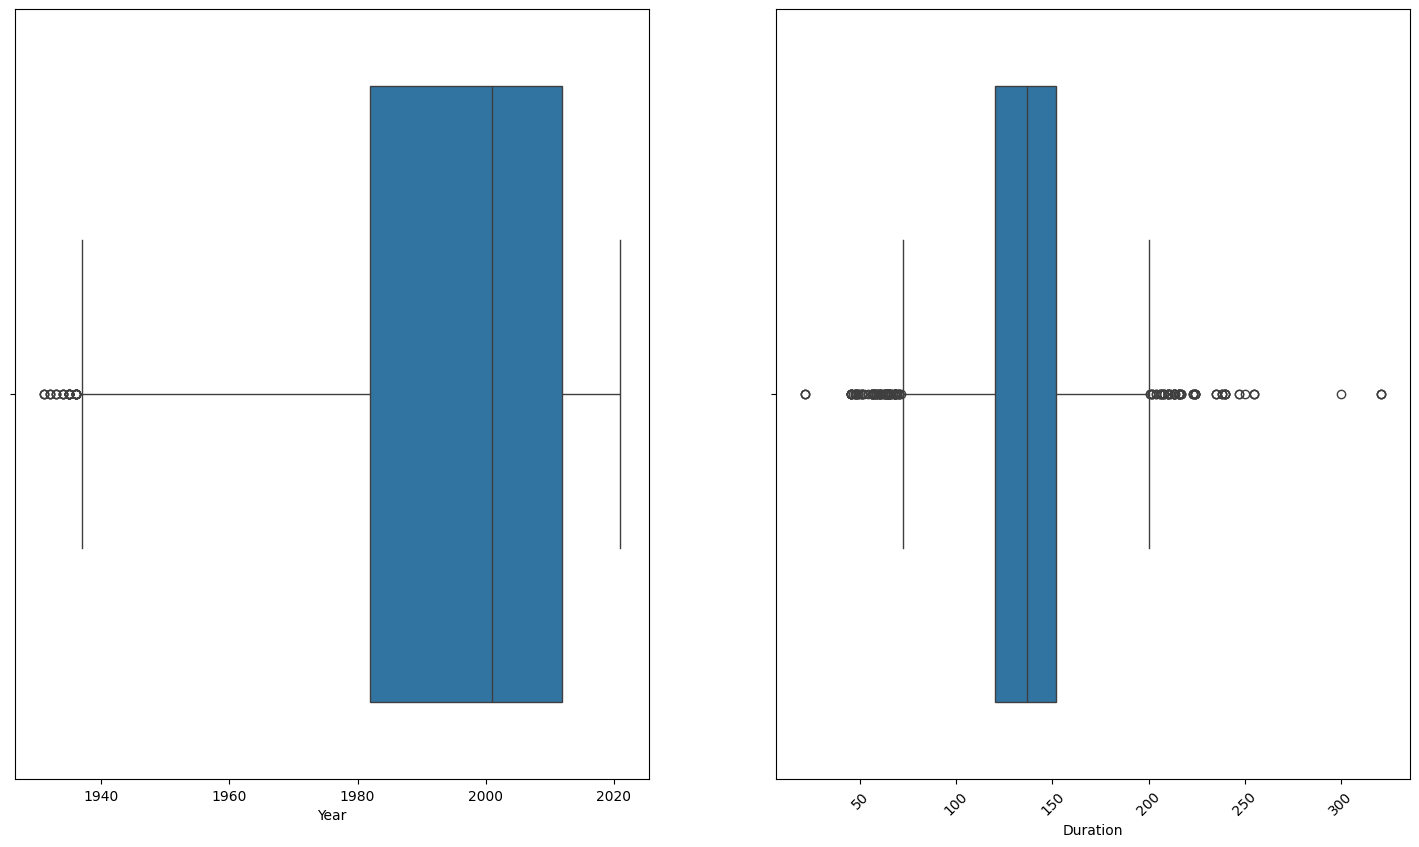

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,10))
sns.boxplot(x=df['Year'],ax=ax[0])
sns.boxplot(x=df['Duration'],ax=ax[1])
plt.xticks(rotation=45)
plt.show()

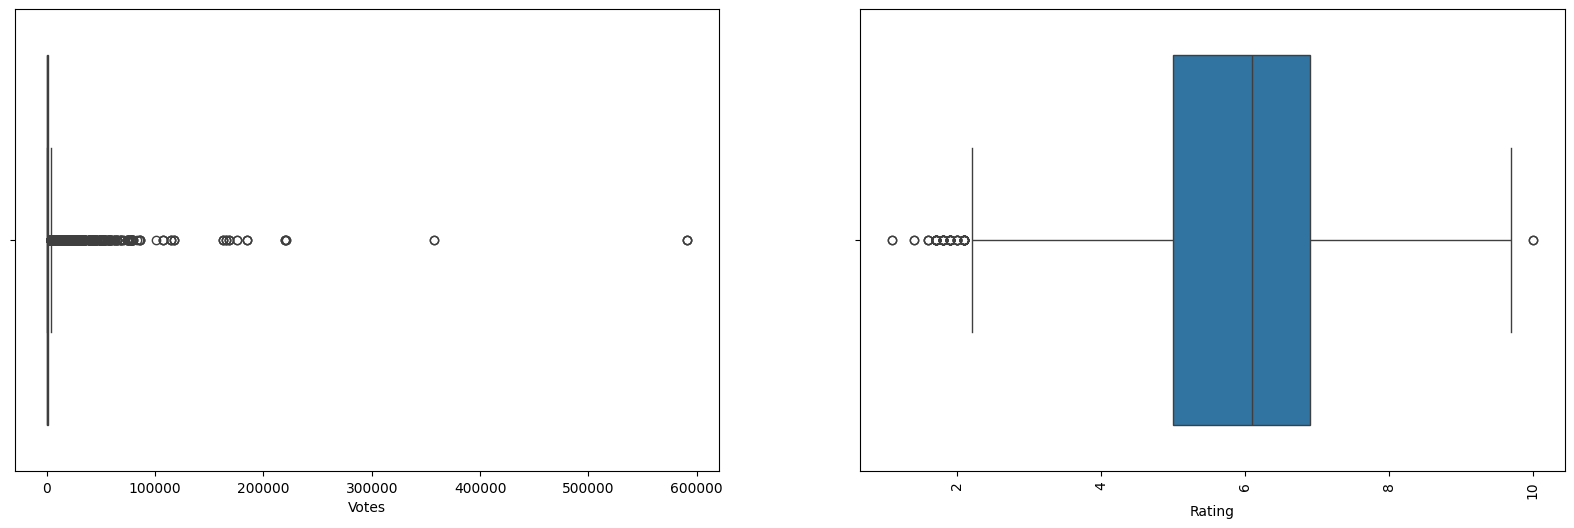

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x=df['Votes'],ax=ax[0])
sns.boxplot(x=df['Rating'],ax=ax[1])
plt.xticks(rotation=90)
plt.show()

Outliers removal

In [ ]:
from scipy import stats
df=df[(np.abs(stats.zscore(df['Votes']))<3)]
df=df[(np.abs(stats.zscore(df['Year']))<3)]
df=df[(np.abs(stats.zscore(df['Duration']))<3)]
df=df[(np.abs(stats.zscore(df['Rating']))<3)]
std1=np.std(df)
std1
#Higher deviation means data is more spread out,lower deviation means data is more clusterd together

Year          19.151143
Duration      23.449875
Rating         1.350986
Votes       5561.084038
dtype: float64

In [ ]:
#replacing null values with the most common rating
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

In [ ]:
#filling missing values
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [ ]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df.describe()

,Year,Duration,Rating,Votes
count,11707.000000,11707.000000,11707.000000,11707.000000
mean,1995.975228,135.666097,5.863441,2208.674127
std,19.151961,23.450876,1.351043,5561.321564
min,1938.000000,62.000000,1.800000,5.000000
25%,1982.000000,120.000000,5.000000,41.000000
50%,2001.000000,137.000000,6.100000,203.000000
75%,2012.000000,152.000000,6.900000,1334.000000
max,2021.000000,208.000000,9.700000,49164.000000


In [ ]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
df.corr()

,Year,Duration,Rating,Votes
Year,1.000000,-0.325285,-0.253323,0.268038
Duration,-0.325285,1.000000,0.029049,0.124435
Rating,-0.253323,0.029049,1.000000,0.200991
Votes,0.268038,0.124435,0.200991,1.000000


Feature selection

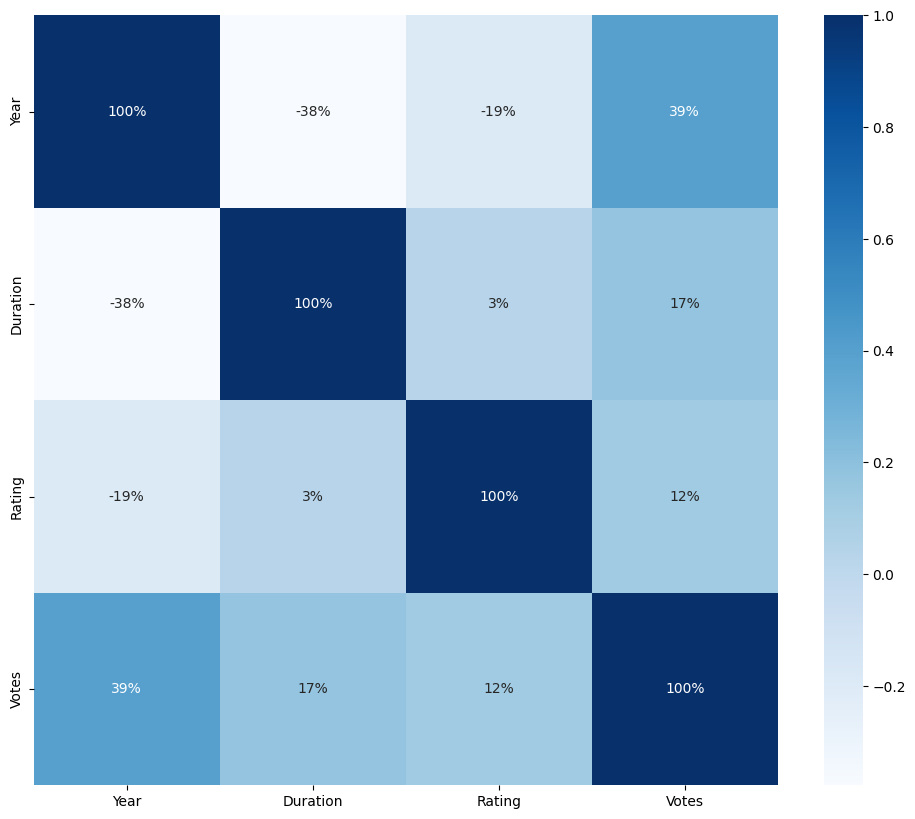

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap="Blues", fmt='.0%')
plt.show()

In [ ]:
df.drop(['Duration'],axis=1,inplace=True)
# Dropping non essential columns
df.drop(['Name'], axis = 1, inplace = True)

Data Visualization

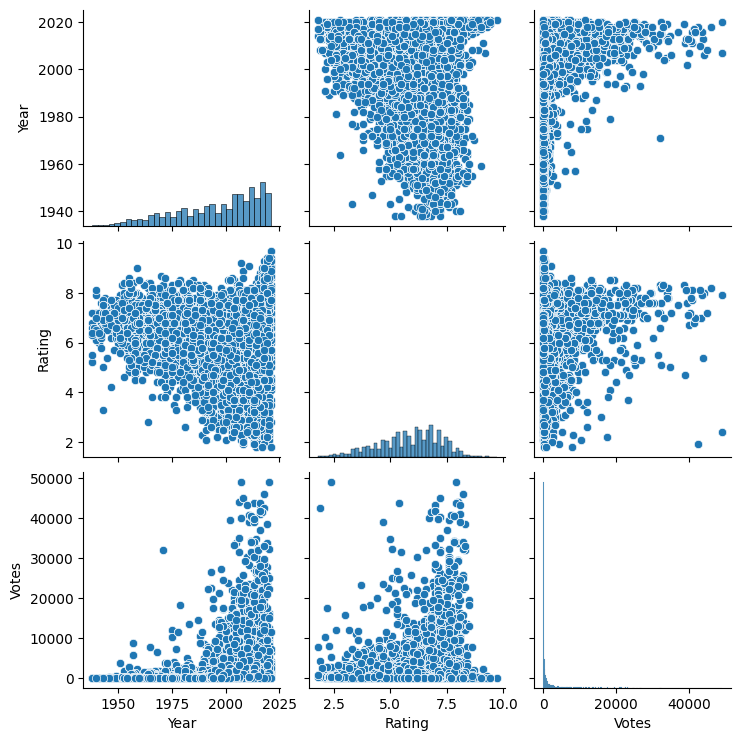

In [ ]:
sns.pairplot(df)

[Text(0, 0.0, ''),
 Text(0, 50.0, ''),
 Text(0, 100.0, ''),
 Text(0, 150.0, ''),
 Text(0, 200.0, ''),
 Text(0, 250.0, ''),
 Text(0, 300.0, ''),
 Text(0, 350.0, ''),
 Text(0, 400.0, ''),
 Text(0, 450.0, '')]

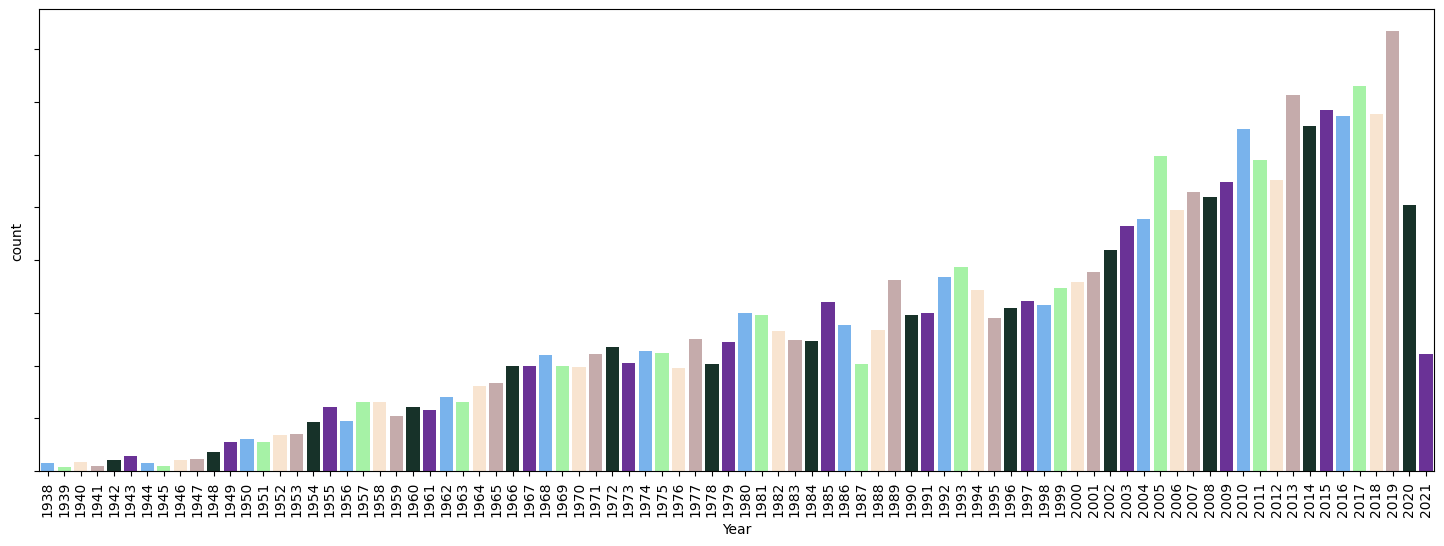

In [ ]:
colors=['#66b3ff','#99ff99','#FFE4C9','#CAA6A6','#12372A','#6C22A6']
plt.figure(figsize=(18,6))
sns.countplot(x=df['Year'],palette=colors)
plt.xticks(rotation=90)
plt.gca().set_yticklabels([])

Text(0.5, 1.0, 'Number of Movies Per Year')

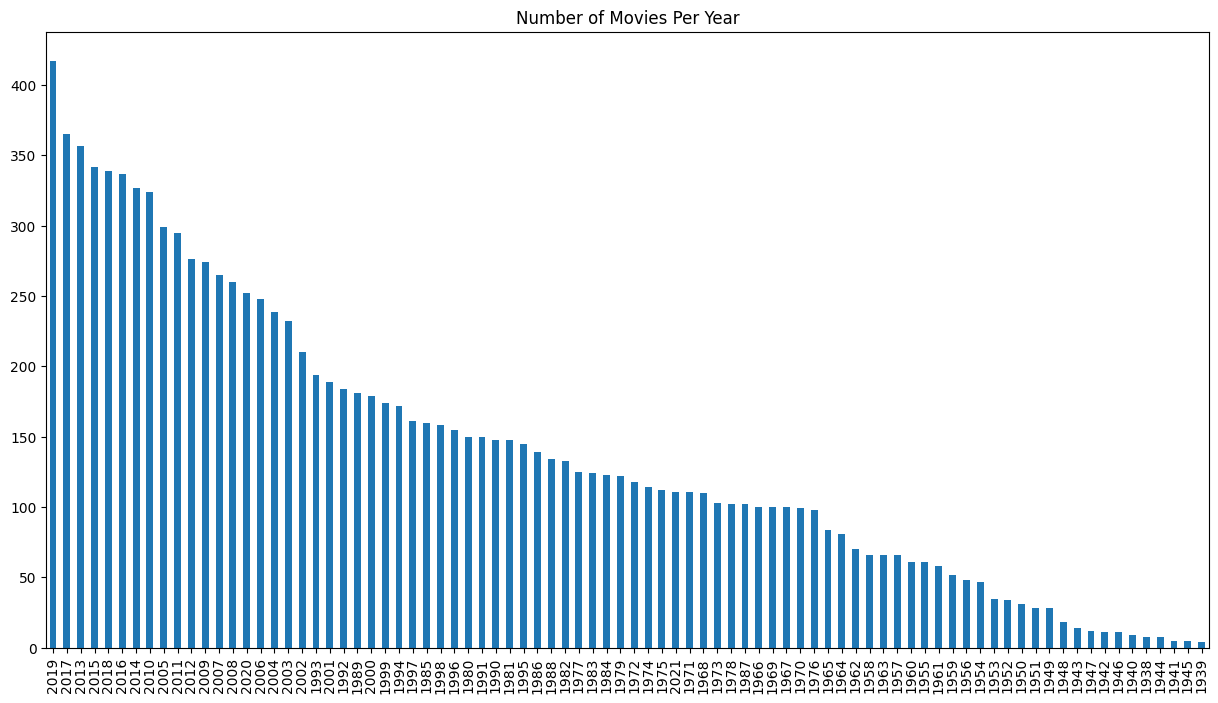

In [ ]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')

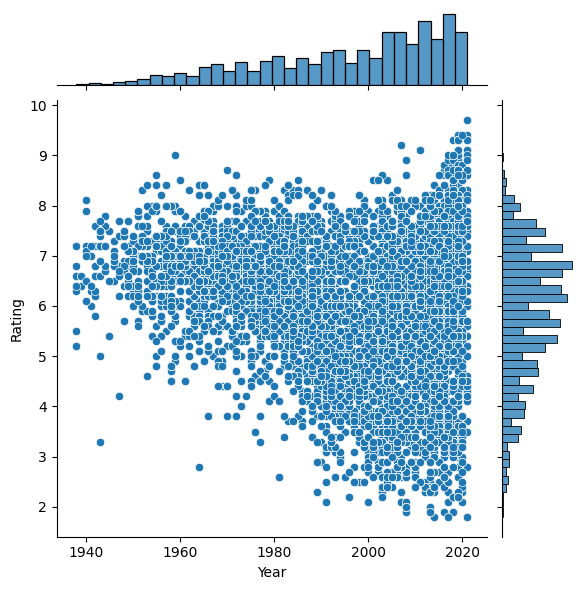

In [ ]:
sns.jointplot(x=df['Year'],y=df['Rating'])

<Axes: xlabel='Year', ylabel='Rating'>

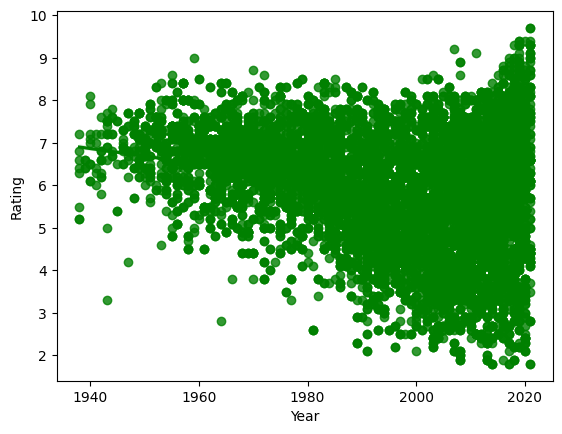

In [ ]:
sns.regplot(x=df['Year'],y=df['Rating'],color='g')


<Axes: xlabel='Votes', ylabel='Rating'>

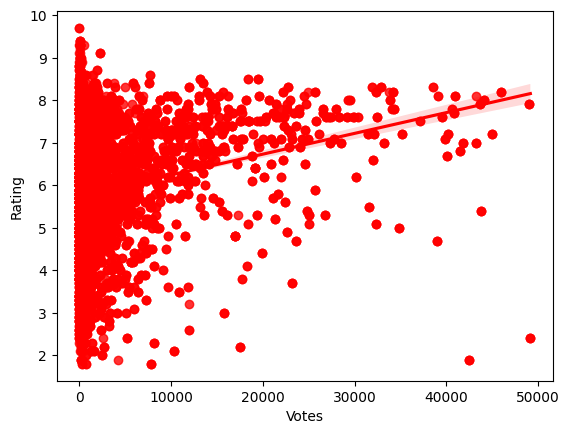

In [ ]:
sns.regplot(x=df['Votes'],y=df['Rating'],color='r')

Calculating standard deviation

In [ ]:
std=np.std(df)
std

Year        19.151143
Rating       1.350986
Votes     5561.084038
dtype: float64

Feature Engineering-selecting,extracting relevant features from data

This calculates the mean rating for each genre group and broadcasts the result back to the original DataFrame df. So, for each row in df, the mean rating of the corresponding genre is assigned to the genre_mean_rating column.
After executing this code, genre_mean_rating will be a pandas Series with the same length as the DataFrame df, containing the mean rating for each genre group. This can be useful for tasks such as imputing missing values or creating new features based on aggregated information.

In [ ]:
#grouping the columns with their average rating and then creating a new feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating
director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating
actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.040855,7.000000,6.850000,7.000000,7.000000
3,2019,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.729345,4.400000,5.250000,4.400000,4.460000
3,2019,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.792757,4.400000,5.250000,4.400000,4.460000
5,1997,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.729345,5.335135,4.793617,5.578378,5.930000
5,1997,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.040855,5.335135,4.793617,5.578378,5.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15503,1989,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.040855,6.290476,6.377419,5.800000,6.018750
15505,1999,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.519515,5.175000,5.311823,4.603704,5.754545
15505,1999,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,6.040855,5.175000,5.311823,4.603704,5.754545
15508,1998,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.519515,4.090625,6.045128,5.632558,5.780000


reset the index

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.040855,7.000000,6.850000,7.000000,7.000000
1,2019,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.729345,4.400000,5.250000,4.400000,4.460000
2,2019,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.792757,4.400000,5.250000,4.400000,4.460000
3,1997,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.729345,5.335135,4.793617,5.578378,5.930000
4,1997,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.040855,5.335135,4.793617,5.578378,5.930000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11702,1989,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.040855,6.290476,6.377419,5.800000,6.018750
11703,1999,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.519515,5.175000,5.311823,4.603704,5.754545
11704,1999,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,6.040855,5.175000,5.311823,4.603704,5.754545
11705,1998,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.519515,4.090625,6.045128,5.632558,5.780000


In [ ]:
x = df[[ 'Year', 'Votes', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']].values
y = df['Rating'].values
x.ndim

2

Splitting training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[2018.        , 4831.        ,    5.62615845, ...,    6.        ,
           5.78      ,    6.925     ],
       [1980.        ,   28.        ,    5.79275684, ...,    6.52592593,
           5.81833333,    5.67435897],
       [1997.        , 1261.        ,    5.80221187, ...,    5.31182266,
           5.07659574,    5.61880342],
       ...,
       [1992.        ,  531.        ,    6.0408553 , ...,    5.93333333,
           5.87586207,    5.6       ],
       [1975.        ,   36.        ,    6.0408553 , ...,    6.30658683,
           6.99210526,    6.212     ],
       [2014.        ,   32.        ,    6.0408553 , ...,    6.68      ,
           6.77142857,    7.1       ]])

Model creation-Multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([7.37394877, 4.35052475, 3.95293445, ..., 5.26902714, 5.88198152,
       4.88589524])

In [ ]:
print('slope is',model.coef_)
list(zip(x,model.coef_))

slope is [-2.04032843e-03  3.61143516e-05  5.24482802e-02  4.13982010e-01
  2.01073673e-01  2.88945061e-01  3.52703686e-01]


[(array([2019.       ,    8.       ,    6.0408553,    7.       ,
            6.85     ,    7.       ,    7.       ]),
  -0.002040328432629168),
 (array([2019.        ,   35.        ,    5.72934451,    4.4       ,
            5.25      ,    4.4       ,    4.46      ]),
  3.6114351571837764e-05),
 (array([2019.        ,   35.        ,    5.79275684,    4.4       ,
            5.25      ,    4.4       ,    4.46      ]),
  0.05244828018443771),
 (array([1997.        ,  827.        ,    5.72934451,    5.33513514,
            4.79361702,    5.57837838,    5.93      ]),
  0.41398200955216197),
 (array([1997.        ,  827.        ,    6.0408553 ,    5.33513514,
            4.79361702,    5.57837838,    5.93      ]),
  0.20107367323057437),
 (array([1997.        ,  827.        ,    6.23015075,    5.33513514,
            4.79361702,    5.57837838,    5.93      ]),
  0.288945060828189),
 (array([2005.        , 1086.        ,    6.0408553 ,    7.40714286,
            5.45686275,    6.82857143,   

In [ ]:
print('Constant is',model.intercept_)

Constant is 2.183011385113195


In [ ]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
0,7.3,7.373949,-0.073949
1,2.4,4.350525,-1.950525
2,3.4,3.952934,-0.552934
3,7.3,6.853317,0.446683
4,6.0,5.421047,0.578953
...,...,...,...
3508,6.1,6.269234,-0.169234
3509,7.0,7.234642,-0.234642
3510,5.1,5.269027,-0.169027
3511,6.2,5.881982,0.318018


<Axes: >

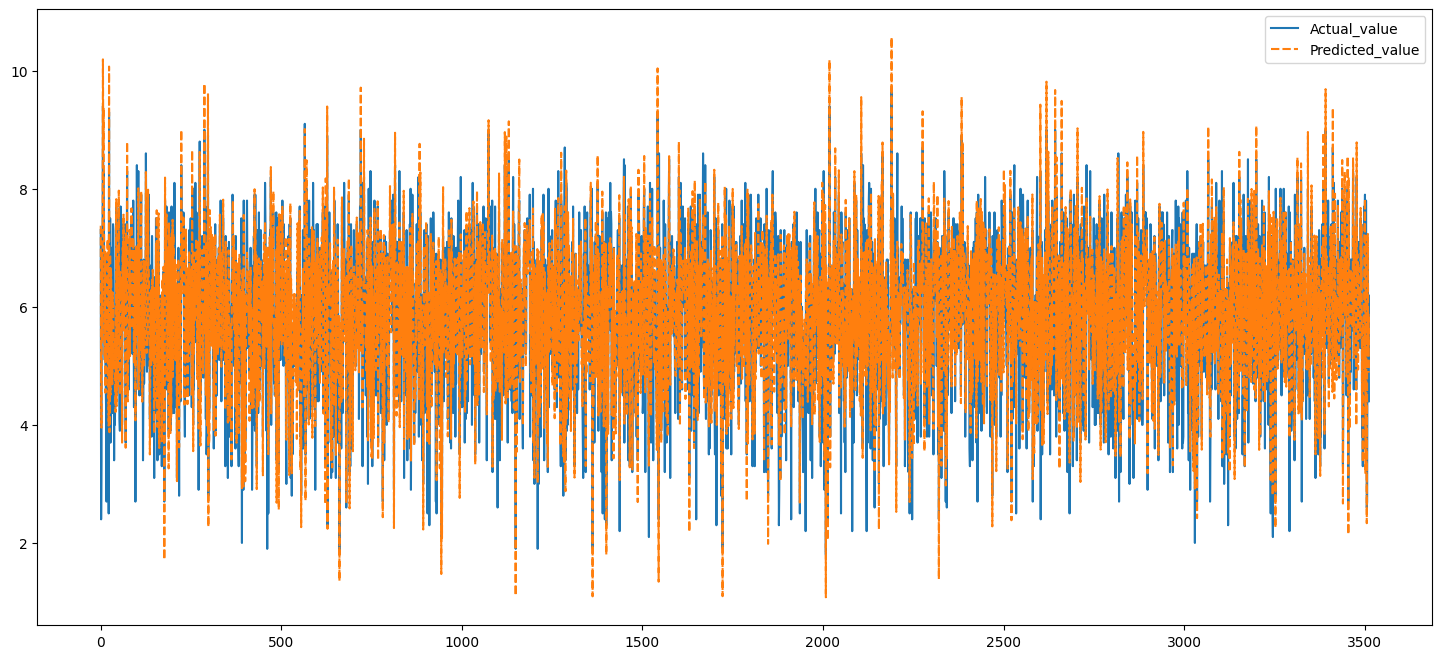

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df1[['Actual_value', 'Predicted_value']])

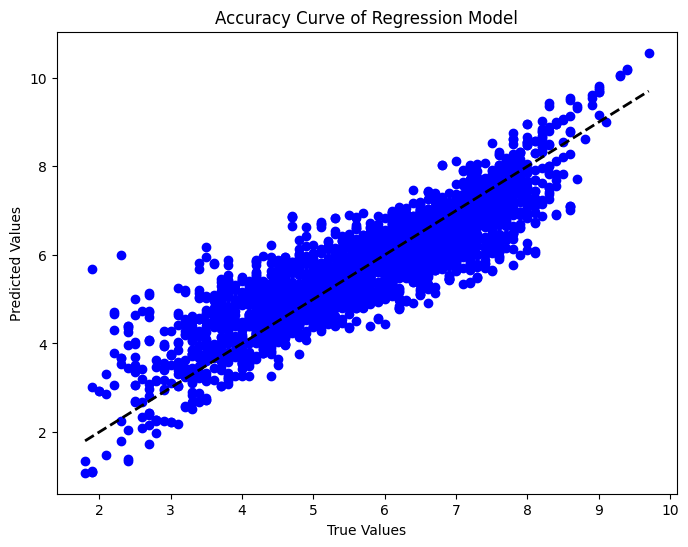

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Accuracy Curve of Regression Model')
plt.show()

Performance evaluation

In [ ]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean squared Error is',mean_squared_error(y_test,y_pred))

Mean Absolute Error is 0.4745826061635165
Mean squared Error is 0.39998094153352104


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))

Percentage error is 0.09277638183594833


In [ ]:
from sklearn.metrics import r2_score
r2_multiple=r2_score(y_test,y_pred)
print("R2_score is ",r2_multiple)

R2_score is  0.7837439142431486


Random Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([7.277, 2.391, 3.512, ..., 4.876, 6.207, 4.496])

<Axes: >

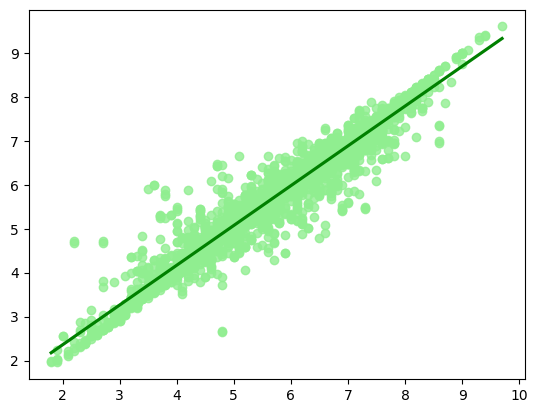

In [ ]:
sns.regplot(x=y_test,y=y_pred1,color='lightgreen',line_kws={"color": "g"})

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred1))
print('Mean squared Error is',mean_squared_error(y_test,y_pred1))
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred1))
r2_random=r2_score(y_test,y_pred1)
print("R2_score is ",r2_random)

Mean Absolute Error is 0.20059749501850305
Mean squared Error is 0.12241148448619406
Percentage error is 0.038228735687128895
R2_score is  0.9338162753825827


Decision tree regression


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()

In [ ]:
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([7.3, 2.4, 3.2, ..., 5.1, 6.2, 4.4])

<Axes: >

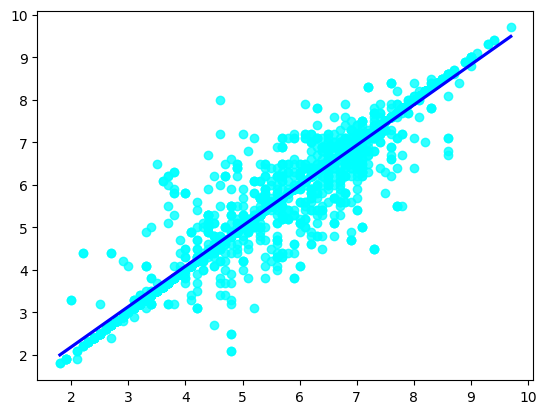

In [ ]:
sns.regplot(x=y_test,y=y_pred2,color='cyan',line_kws={"color": "b"})

In [ ]:
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred2))
print('Mean squared Error is',mean_squared_error(y_test,y_pred2))
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred2))
r2_decision=r2_score(y_test,y_pred2)
print("R2_score is ",r2_decision)

Mean Absolute Error is 0.15140905209222896
Mean squared Error is 0.17754910333048676
Percentage error is 0.028304105821907857
R2_score is  0.9040052409280307


Models Evaluation

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Treee':DecisionTreeRegressor()
}

r2_scores = {}
for name, model in models.items():
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_test)
  r2_scores[name] = r2_score(y_test, y_predicted)

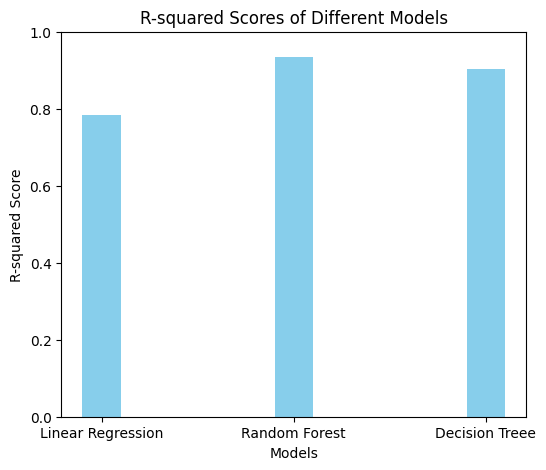

In [ ]:
plt.figure(figsize=(6, 5))
plt.bar(range(len(r2_scores)), list(r2_scores.values()), align='center', color='skyblue',width=0.2)
plt.xticks(range(len(r2_scores)), list(r2_scores.keys()))
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 as R-squared ranges from 0 to 1
plt.show()